In [28]:
import pandas as pd

# Cargar el archivo CSV con punto y coma como delimitador
df = pd.read_csv("/Users/sebastianrodriguez/Desktop/Proyecto1/data_discretizada.csv", delimiter=";")
df = df.drop("Unnamed: 8", axis = 1 )
df = df.drop("Unnamed: 9", axis = 1 )
df = df.drop("Unnamed: 10", axis = 1 )
df = df.drop("Unnamed: 11", axis = 1 )
df = df.drop("Unnamed: 12", axis = 1 )
df = df.drop("Unnamed: 13", axis = 1 )
df = df.drop("Unnamed: 14", axis = 1 )
df = df.drop("Unnamed: 15", axis = 1 )
# Guardar el DataFrame en un archivo CSV con coma como delimitador
df.to_csv("nuevo_archivo.csv", index=False)

In [1]:
import pandas as pd

df = pd.read_csv("/Users/sebastianrodriguez/Desktop/Proyecto1/nuevo_archivo.csv")
print(df.head())
print(df.describe())
print(df.columns)
import pandas as pd




   Debtor  Gender  Scholarship holder  Curricular units 1st sem (approved)  \
0       0       1                   0                                    0   
1       0       1                   0                                    0   
2       0       1                   0                                    0   
3       0       0                   0                                    0   
4       0       0                   0                                    0   

   Curricular units 1st sem (grade)  Curricular units 2nd sem (approved)  \
0                                 0                                    0   
1                                 2                                    0   
2                                 0                                    0   
3                                 2                                    0   
4                                 2                                    0   

   Curricular units 2nd sem (grade)  Target  
0                           

In [2]:
#por restriccion
from pgmpy.estimators import BicScore
from pgmpy.estimators import PC
scoring_method_bic = BicScore(data=df)
est = PC(data=df)

estimated_model = est.estimate(variant="stable", max_cond_vars=4)
print(estimated_model)
print(estimated_model.nodes())
print(estimated_model.edges())
print(scoring_method_bic.score(estimated_model))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Working for n conditional variables: 4: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

DAG with 8 nodes and 9 edges
['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Scholarship holder', 'Target', 'Debtor', 'Gender', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)']
[('Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'), ('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'), ('Scholarship holder', 'Target'), ('Target', 'Curricular units 2nd sem (grade)'), ('Debtor', 'Target'), ('Gender', 'Target'), ('Gender', 'Scholarship holder'), ('Curricular units 2nd sem (approved)', 'Target')]
-14313.880356782487


In [47]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

estimated_model = BayesianNetwork(estimated_model)
estimated_model.fit(data=df, estimator = MaximumLikelihoodEstimator) 
for i in estimated_model.nodes():
    print(estimated_model.get_cpds(i))

+----------------------------------------+-------------+
| Curricular units 1st sem (approved)(0) | 0.795041    |
+----------------------------------------+-------------+
| Curricular units 1st sem (approved)(1) | 0.182094    |
+----------------------------------------+-------------+
| Curricular units 1st sem (approved)(2) | 0.0201102   |
+----------------------------------------+-------------+
| Curricular units 1st sem (approved)(3) | 0.00247934  |
+----------------------------------------+-------------+
| Curricular units 1st sem (approved)(4) | 0.000275482 |
+----------------------------------------+-------------+
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
+-----------------------+--------------------+--------------------+
| Gender                | Gender(0)          | Gender(1)          |
+-----------------------+--------------------+--------------------+
| Scholarship holder(0) | 0.6728265434691306 | 0.8478783026421137 |
+------------

In [4]:
#por Hill climbing
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score

scoring_method = K2Score(data=df)
esth = HillClimbSearch(data=df)
estimated_modelh = esth.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)
print(estimated_modelh)
print(estimated_modelh.nodes())
print(estimated_modelh.edges())
print(scoring_method.score(estimated_modelh))
print(scoring_method_bic.score(estimated_modelh))

  0%|          | 14/10000 [00:00<02:08, 77.54it/s]

DAG with 8 nodes and 13 edges
['Debtor', 'Gender', 'Scholarship holder', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Target']
[('Gender', 'Scholarship holder'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'), ('Curricular units 1st sem (approved)', 'Target'), ('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'), ('Curricular units 1st sem (grade)', 'Target'), ('Curricular units 1st sem (grade)', 'Gender'), ('Curricular units 2nd sem (approved)', 'Target'), ('Curricular units 2nd sem (approved)', 'Gender'), ('Curricular units 2nd sem (grade)', 'Target'), ('Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)'), ('Target', 'Scholarship holder'), ('Target', 'Debtor'), ('Target', 'Gender')]
-13694.606864119809
-15070.055850773046


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 10/10000 [00:00<03:57, 42.15it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


DAG with 8 nodes and 10 edges
['Debtor', 'Gender', 'Scholarship holder', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Target']
[('Scholarship holder', 'Gender'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'), ('Curricular units 2nd sem (approved)', 'Target'), ('Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'), ('Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)'), ('Target', 'Curricular units 2nd sem (grade)'), ('Target', 'Scholarship holder'), ('Target', 'Debtor'), ('Target', 'Gender'), ('Target', 'Curricular units 1st sem (grade)')]
-13788.885951499691
-13788.885951499691
CPDs del modelo para Curricular units 1st sem (grade)
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
CPDs del modelo para Target
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-

  9%|▉         | 8/87 [00:00<00:01, 57.45it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
 18%|█▊        | 16/87 [00:06<00:33,  2.09it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/B

Exactitud del modelo: 0.8333333333333334
Verdaderos Positivos:  182
Falsos Positivos:  97
Verdaderos Negativos:  423
Falsos Negativos:  24
Matriz de confusión:
[[182  97]
 [ 24 423]]
Valor F1: 0.8270813121675071
Exhaustividad (Recall): 0.8333333333333334


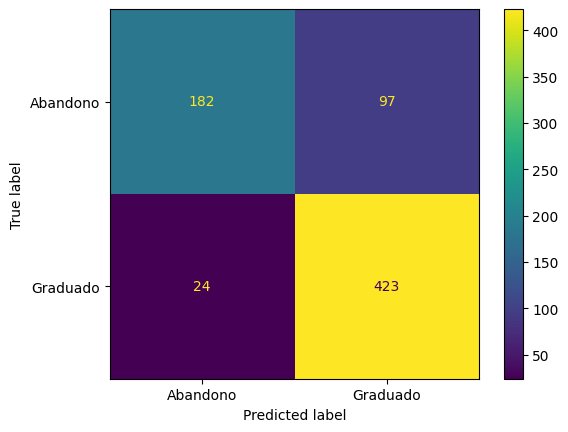

In [48]:
#por puntaje bic
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianModel
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
scoring_method_bic = BicScore(data=df)

esth_bic = HillClimbSearch(data=df)

estimated_modelh_bic = esth_bic.estimate(scoring_method=scoring_method_bic, max_indegree=4, max_iter=int(1e4))

print(estimated_modelh_bic)
print(estimated_modelh_bic.nodes())
print(estimated_modelh_bic.edges())

# Imprime el puntaje BIC del modelo
print(scoring_method_bic.score(estimated_modelh_bic))
modelo = BayesianModel([('Scholarship holder', 'Gender'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'), ('Curricular units 2nd sem (approved)', 'Target'), ('Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'), ('Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)'), ('Target', 'Curricular units 2nd sem (grade)'), ('Target', 'Scholarship holder'), ('Target', 'Debtor'), ('Target', 'Gender'), ('Target', 'Curricular units 1st sem (grade)')])

print(scoring_method_bic.score(modelo))
from sklearn.model_selection import train_test_split
# Dividir los datos
# X crea un dataframe que contiene todas la columnas menos 'target'. Es decir, las caracteristicas que utilizara para hacer predicciones
X = df.drop(columns=['Target'])
# Y crea una serie que contiene solo la columna "Target". 
y = df['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


#Codigo utilizado para combrobar mediante un metodo de regresion lineal
#from sklearn.linear_model import LogisticRegression
#modelo = LogisticRegression()
#modelo.fit(X_train, y_train)


from pgmpy.estimators import MaximumLikelihoodEstimator
emv = MaximumLikelihoodEstimator(modelo , data = df)

# Estimar para nodos sin padres


cpdem_grade1 = emv.estimate_cpd(node="Curricular units 1st sem (grade)")
print("CPDs del modelo para Curricular units 1st sem (grade)")
print(cpdem_grade1)



# Estimar para nodo Target
cpdem_target = emv.estimate_cpd(node="Target")
print("CPDs del modelo para Target")
print(cpdem_target)

modelo.fit(data=df , estimator = MaximumLikelihoodEstimator )
for i in modelo.nodes():
    print(modelo.get_cpds(i))

#################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

#Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", exactitud)

#Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Verdaderos Positivos: ", confusion[0][0])
print("Falsos Positivos: ", confusion[0][1])
print("Verdaderos Negativos: ", confusion[1][1])
print("Falsos Negativos: ", confusion[1][0])

clas= ['Abandono', 'Graduado']
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=clas)
disp.plot() 

f1 = f1_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted') 

print(f'Valor F1: {f1}')
print(f'Exhaustividad (Recall): {recall}')




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


-16566.520894778525
-21682.463855749957
[('Gender', 'Scholarship holder'), ('Scholarship holder', 'Debtor'), ('Scholarship holder', 'Target'), ('Debtor', 'Target'), ('Curricular units 2nd sem (grade)', 'Target'), ('Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)'), ('Curricular units 2nd sem (approved)', 'Target'), ('Curricular units 1st sem (grade)', 'Target'), ('Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)'), ('Curricular units 1st sem (approved)', 'Target')]
CPDs del modelo para Gender
+-----------+----------+
| Gender(0) | 0.655923 |
+-----------+----------+
| Gender(1) | 0.344077 |
+-----------+----------+
CPDs del modelo para Curricular units 1st sem (grade)
+-------------------------------------+-----------+
| Curricular units 1st sem (grade)(0) | 0.178237  |
+-------------------------------------+-----------+
| Curricular units 1st sem (grade)(1) | 0.0168044 |
+-------------------------------------+-----------+
| Curricular uni

100%|██████████| 87/87 [00:00<00:00, 1379.22it/s]


Exactitud del modelo: 0.8264462809917356
Verdaderos Positivos:  178
Falsos Positivos:  101
Verdaderos Negativos:  422
Falsos Negativos:  25
Matriz de confusión:
[[178 101]
 [ 25 422]]
Valor F1: 0.8195626343191743
Exhaustividad (Recall): 0.8264462809917356


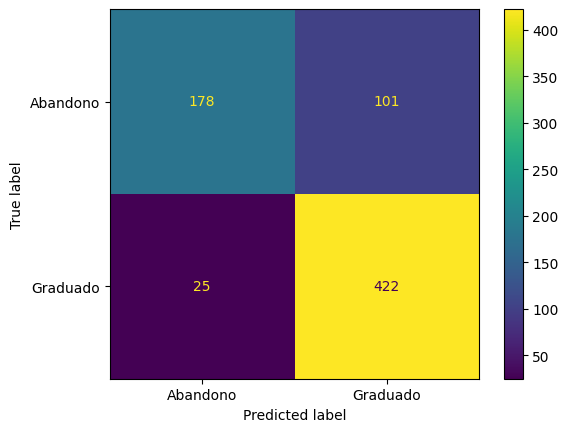

In [39]:
# modelo actual
from pgmpy.models import BayesianModel
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
modelo = BayesianModel([
('Gender', 'Scholarship holder'),   ('Scholarship holder', 'Debtor'),   ('Scholarship holder', 'Target'),
('Curricular units 2nd sem (grade)', 'Target'),  ('Curricular units 2nd sem (approved)', 'Target'),   ('Curricular units 1st sem (grade)', 'Target'),
('Curricular units 1st sem (approved)', 'Target'),  ('Debtor', 'Target'),  ('Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)'),
('Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)')
])
print(scoring_method.score(modelo))
print(scoring_method_bic.score(modelo))

print(modelo.edges())


from sklearn.model_selection import train_test_split
# Dividir los datos
# X crea un dataframe que contiene todas la columnas menos 'target'. Es decir, las caracteristicas que utilizara para hacer predicciones
X = df.drop(columns=['Target'])
# Y crea una serie que contiene solo la columna "Target". 
y = df['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


#Codigo utilizado para combrobar mediante un metodo de regresion lineal
#from sklearn.linear_model import LogisticRegression
#modelo = LogisticRegression()
#modelo.fit(X_train, y_train)


from pgmpy.estimators import MaximumLikelihoodEstimator
emv = MaximumLikelihoodEstimator(modelo , data = df)

# Estimar para nodos sin padres
cpdem_gender = emv.estimate_cpd(node="Gender") 
print("CPDs del modelo para Gender")
print(cpdem_gender)

cpdem_grade1 = emv.estimate_cpd(node="Curricular units 1st sem (grade)")
print("CPDs del modelo para Curricular units 1st sem (grade)")
print(cpdem_grade1)

cpdem_grade2 = emv.estimate_cpd(node="Curricular units 2nd sem (grade)")
print("CPDs del modelo para Curricular units 2nd sem (grade)")
print(cpdem_grade2)

# Estimar para nodo Target
cpdem_target = emv.estimate_cpd(node="Target")
print("CPDs del modelo para Target")
print(cpdem_target)

modelo.fit(data=df , estimator = MaximumLikelihoodEstimator )
for i in modelo.nodes():
    print(modelo.get_cpds(i))

#################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

#Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", exactitud)

#Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Verdaderos Positivos: ", confusion[0][0])
print("Falsos Positivos: ", confusion[0][1])
print("Verdaderos Negativos: ", confusion[1][1])
print("Falsos Negativos: ", confusion[1][0])
clas= ['Abandono', 'Graduado']
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=clas)
disp.plot() 

f1 = f1_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted') 

print(f'Valor F1: {f1}')
print(f'Exhaustividad (Recall): {recall}')